## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
comb_data.rename(columns={"Tumor_Volume_mm3": "Tumor Volume (mm3)", "Age_months": "Age (months)"}, inplace=True)

# Display the data table for preview
comb_data.head()

Mouse ID Drug Regimen   Sex  Age (months)  Weight (g)  Timepoint  \
0     k403     Ramicane  Male            21          16          0   
1     k403     Ramicane  Male            21          16          5   
2     k403     Ramicane  Male            21          16         10   
3     k403     Ramicane  Male            21          16         15   
4     k403     Ramicane  Male            21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
print(f"Total mice number in merged dataframe: {len(comb_data['Mouse ID'].value_counts())}")

Total mice number in merged dataframe: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = comb_data.loc[comb_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
len(duplicate_mice)

1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=pd.DataFrame(duplicate_mice)
duplicate_mouse_id.head()

0
0  g989

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = comb_data[comb_data['Mouse ID'].isin(duplicate_mice)==False]
clean_mice.head()

Mouse ID Drug Regimen   Sex  Age (months)  Weight (g)  Timepoint  \
0     k403     Ramicane  Male            21          16          0   
1     k403     Ramicane  Male            21          16          5   
2     k403     Ramicane  Male            21          16         10   
3     k403     Ramicane  Male            21          16         15   
4     k403     Ramicane  Male            21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"Total mice number in cleaned dataframe: {len(clean_mice['Mouse ID'].value_counts())}")

Total mice number in cleaned dataframe: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = clean_mice.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_med = clean_mice.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_var = clean_mice.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = clean_mice.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_mice.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

sum_stats_table = pd.DataFrame({"Tumor Volume Mean (mm3)": regimen_mean, 
                                    "Tumor Volume Med (mm3)":regimen_med, 
                                    "Tumor Volume Var (mm3)":regimen_var, 
                                    "Tumor Volume Std Dev (mm3)": regimen_std, 
                                    "Tumor Volume SEM (mm3)": regimen_sem})

sum_stats_table = sum_stats_table.sort_values(by="Tumor Volume Mean (mm3)", ascending=True)
sum_stats_table

Tumor Volume Mean (mm3)  Tumor Volume Med (mm3)  \
Drug Regimen                                                    
Ramicane                    40.216745               40.673236   
Capomulin                   40.675741               41.557809   
Propriva                    52.320930               50.446266   
Ceftamin                    52.591172               51.776157   
Infubinol                   52.884795               51.820584   
Zoniferol                   53.236507               51.818479   
Placebo                     54.033581               52.288934   
Stelasyn                    54.233149               52.431737   
Naftisol                    54.331565               52.509285   
Ketapril                    55.235638               53.698743   

              Tumor Volume Var (mm3)  Tumor Volume Std Dev (mm3)  \
Drug Regimen                                                       
Ramicane                   23.486704                    4.846308   
Capomulin                  24.947764                    4.994774   
Propriva                   43.852013                    6.622085   
Ceftamin                   39.290177                    6.268188   
Infubinol                  43.128684                    6.567243   
Zoniferol                  48.533355                    6.966589   
Placebo                    61.168083                    7.821003   
Stelasyn                   59.450562                    7.710419   
Naftisol                   66.173479                    8.134708   
Ketapril                   68.553577                    8.279709   

              Tumor Volume SEM (mm3)  
Drug Regimen                          
Ramicane                    0.320955  
Capomulin                   0.329346  
Propriva                    0.544332  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Zoniferol                   0.516398  
Placebo                     0.581331  
Stelasyn                    0.573111  
Naftisol                    0.596466  
Ketapril                    0.603860

## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
data_points = clean_mice['Drug Regimen'].value_counts()
data = pd.DataFrame(data_points)
data = data.reset_index(drop=False)
data = data.sort_values(by="Drug Regimen", ascending=True)

x_axis= 'index'
y_axis = 'Drug Regimen'
pandas_bar = data.plot.barh(x_axis, y_axis, xlim=(0,240), ylim=(0,10), color='green', alpha=0.75, 
                            figsize = (10,5), width = 0.75, stacked=True)
pandas_bar.set_title("Mice per Treatment", fontsize = 20)
pandas_bar.set_ylabel("Drug Regimen", fontsize = 14)
pandas_bar.set_xlabel("Mice Number", fontsize = 14)
pandas_bar.grid(True, linestyle='-', which='major', color='grey', alpha=.5)


In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis= np.arange(len(data))
y_axis = data["Drug Regimen"]
plt.figure(figsize=(10,5))
bar_chart = plt.barh(x_axis, y_axis, color = 'green', alpha=0.75, align='center', label='Drug Regimen') 
plt.xlim(0,240)
plt.ylim(-0.75,9.75)

plt.title('Mice per Treatment', fontsize = 20)
plt.xlabel("Mice Number", fontsize = 14)
plt.ylabel("Drug Regimen", fontsize = 14)
plt.legend(loc='best')

tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, data["index"], rotation="horizontal")
plt.grid(True, linestyle='-', which='major',
                   color='grey', alpha=.5)
plt.show()

Text(0, 0.5, 'Sex')

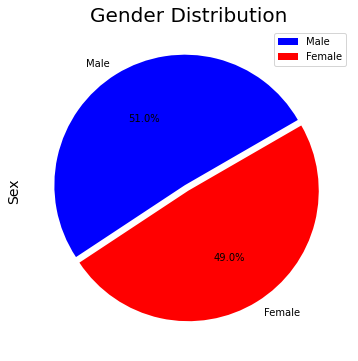

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male = (len(clean_mice.loc[clean_mice["Sex"] == "Male",:])/len(clean_mice["Sex"]))*100
female = (len(clean_mice.loc[clean_mice["Sex"] == "Female",:])/len(clean_mice["Sex"]))*100
gender_df = pd.DataFrame({"Sex": [male, female], "Mice":["Male", "Female"]})
gender_df = gender_df.set_index('Mice')

plot = gender_df.plot.pie(y="Sex", figsize =(6, 6), explode=(0.05,0), colors = 'br', autopct='%1.1f%%',
                          startangle = 30)

plt.title('Gender Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = (len(clean_mice.loc[clean_mice["Sex"] == "Male",:])/len(clean_mice["Sex"]))*100
female = (len(clean_mice.loc[clean_mice["Sex"] == "Female",:])/len(clean_mice["Sex"]))*100
gender_df = pd.DataFrame({"Sex": [male, female], "Mice":["Male", "Female"]})
gender_df = gender_df.set_index('Mice')

labels = ["Male","Female"]
sizes = [male,female]
colors = ['blue', 'red']
explode = (0.05, 0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30,)
plt.title('Gender Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)

Text(0, 0.5, 'Sex')

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_treatment=clean_mice[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]\
                             .groupby(["Mouse ID", "Drug Regimen" ]).last()\
                             .sort_values(by = "Drug Regimen", ascending = True).reset_index()
regimen_treatment.set_index(["Drug Regimen", "Mouse ID"], inplace =True)

capomulin = regimen_treatment.loc['Capomulin']["Tumor Volume (mm3)"]
quartiles_capomulin = capomulin.quantile([.25,.5,.75])
lower_capomulin = quartiles_capomulin[.25]
upper_capomulin = quartiles_capomulin[.75]
iqr_capomulin = upper_capomulin-lower_capomulin
capomulin_outliers = []
for value in capomulin:
    if value > upper_capomulin + 1.5*iqr_capomulin:
        capomulin_outliers.append(value)
    elif value < lower_capomulin - 1.5*iqr_capomulin:
        capomulin_outliers.append(value)
print(f"There is(are) " + str(len(capomulin_outliers)) + " outlier(s) in Campomulin and here is a list: " + 
      str(capomulin_outliers))
    
ramicane = regimen_treatment.loc['Ramicane']["Tumor Volume (mm3)"]
quartiles_ramicane = ramicane.quantile([.25,.5,.75])
lower_ramicane = quartiles_ramicane[.25]
upper_ramicane = quartiles_ramicane[.75]
iqr_ramicane = upper_ramicane-lower_ramicane
ramicane_outliers = []
for value in ramicane:
    if value > upper_ramicane + 1.5*iqr_ramicane:
        ramicane_outliers.append(value)
    elif value < lower_ramicane - 1.5*iqr_ramicane:
        ramicane_outliers.append(value)
print(f"There is(are) " + str(len(ramicane_outliers)) + " outlier(s) in Ramicane and here is a list: " + 
      str(ramicane_outliers))

infubinol = regimen_treatment.loc['Infubinol']["Tumor Volume (mm3)"]
quartiles_infubinol = infubinol.quantile([.25,.5,.75])
lower_infubinol = quartiles_infubinol[.25]
upper_infubinol = quartiles_infubinol[.75]
iqr_infubinol = upper_infubinol-lower_infubinol
infubinol_outliers = []
for value in infubinol:
    if value > upper_infubinol + 1.5*iqr_infubinol:
        infubinol_outliers.append(value)
    elif value < lower_infubinol - 1.5*iqr_infubinol:
        infubinol_outliers.append(value)
print(f"There is(are) " + str(len(infubinol_outliers)) + " outlier(s) in Infubinol and here is a list: " + 
      str(infubinol_outliers))


ceftamin = regimen_treatment.loc['Ceftamin']["Tumor Volume (mm3)"]
quartiles_ceftamin = ceftamin.quantile([.25,.5,.75])
lower_ceftamin = quartiles_ceftamin[.25]
upper_ceftamin = quartiles_ceftamin[.75]
iqr_ceftamin = upper_ceftamin-lower_ceftamin
ceftamin_outliers = []
for value in ceftamin:
    if value > upper_ceftamin + 1.5*iqr_ceftamin:
        ceftamin_outliers.append(value)
    elif value < lower_ceftamin - 1.5*iqr_ceftamin:
        ceftamin_outliers.append(value)
print(f"There is(are) " + str(len(ceftamin_outliers)) + " outlier(s) in Ceftamin and here is a list: " + 
      str(ceftamin_outliers))

regimen_treatment

There is(are) 0 outlier(s) in Campomulin and here is a list: []
There is(are) 0 outlier(s) in Ramicane and here is a list: []
There is(are) 1 outlier(s) in Infubinol and here is a list: [36.321345799999996]
There is(are) 0 outlier(s) in Ceftamin and here is a list: []


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    g316               40.159220
             s710               40.728578
             t565               34.455298
             r944               41.581521
             r554               32.377357
...                                   ...
Zoniferol    w575               68.401286
             c302               64.575222
             c264               67.942121
             q511               68.611061
             a788               60.413709

[248 rows x 1 columns]

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [capomulin, ramicane, infubinol, ceftamin]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('Treatment Results on Box Plot',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize =14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
plt.ylim(10, 80)

(10.0, 80.0)

## Line and Scatter Plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data =clean_mice[["Drug Regimen","Timepoint", "Mouse ID","Tumor Volume (mm3)"]]
capomulin_data.set_index(["Drug Regimen"], inplace =True)
capomulin_dat = capomulin_data.loc["Capomulin", :]
capomulin_dat = capomulin_dat.sort_values(by="Mouse ID", ascending = True)
capomulin_dat = capomulin_dat.head(10)
capomulin_dat = capomulin_dat.sort_values(by="Timepoint", ascending = True)

line = capomulin_dat.plot.line(x="Timepoint", y="Tumor Volume (mm3)", xlim=(-1,46), ylim=(37,46),color="green", 
                               figsize = (10,5), fontsize = 14, grid=True)
line.set_ylabel("Tumor Volume", fontsize = 14)
line.set_xlabel("Timepoint", fontsize = 14)
line.set_title(' Results for b128 by Capomulin Regimen', fontsize=20)

capomulin_dat.head()

Timepoint Mouse ID  Tumor Volume (mm3)
Drug Regimen                                        
Capomulin             0     b128           45.000000
Capomulin             5     b128           45.651331
Capomulin            10     b128           43.270852
Capomulin            15     b128           43.784893
Capomulin            20     b128           42.731552

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
